In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [12]:
#datos de 10 personas -> [edad , ahorros]
personas = np.array([[0.3, 0.4], [0.4, 0.3],
                    [0.3, 0.2], [0.4, 0.1],
                    [0.5, 0.2], [0.4, 0.8],
                    [0.6, 0.8], [0.5, 0.6],
                    [0.7, 0.6], [0.8, 0.5]])
personas

array([[0.3, 0.4],
       [0.4, 0.3],
       [0.3, 0.2],
       [0.4, 0.1],
       [0.5, 0.2],
       [0.4, 0.8],
       [0.6, 0.8],
       [0.5, 0.6],
       [0.7, 0.6],
       [0.8, 0.5]])

In [9]:
#1: aprobado y 0: denegado
clases = np.array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1])

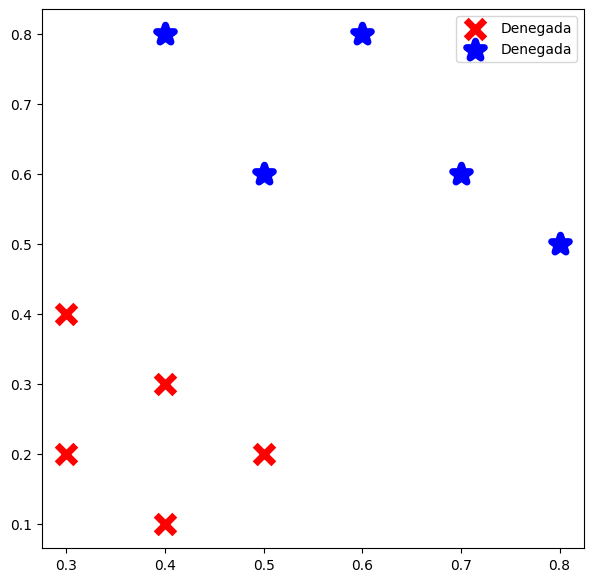

In [14]:
#grafica de dispercion de edad y ahorros 
plt.figure(figsize= (7, 7))
plt.scatter(personas[clases== 0].T[0], 
            personas[clases== 0].T[1],
            marker= 'x', s=180, c= 'r',
            linewidth= 5, label= 'Denegada')
plt.scatter(personas[clases== 1].T[0], 
            personas[clases== 1].T[1],
            marker= '*', s=180, c= 'b',
            linewidth= 5, label= 'Denegada')
plt.legend()
plt.show()

In [39]:
#funcio de activacion
def activacion(peso, x, b):
    z= peso * x
    if z.sum() + b >0:
        return 1
    else:
        return 0

pesos= np.random.uniform(-1, 1, size= 2)
b= np.random.uniform(-1, 1)
pesos, b, activacion(pesos, [.5, .5], b)

(array([-0.28137771, -0.33859759]), -0.5783520771641519, 0)

In [50]:
#entrenamiento de perceptron
pesos= np.random.uniform(-1, 1, size= 2)
b= np.random.uniform(-1, 1)
tasa_de_apendizaje= 0.01
epocas= 100

for epocas in range(epocas):
    error_total= 0 
    for i in range(len(personas)):
        prediccion= activacion(pesos, personas[i], b)
        error= clases[i] - prediccion
        error_total += error**2
        pesos[0] += tasa_de_apendizaje * personas[i][0] * error
        pesos[1] += tasa_de_apendizaje * personas[i][1] * error
        b += tasa_de_apendizaje * error
    print(error_total, end= ' ')

edad_peso = [.2, .9]
activacion(pesos, [.2, .9], b)

5 5 5 8 8 8 9 9 9 8 9 9 9 8 7 7 8 7 7 7 7 7 6 5 5 6 5 5 5 4 5 4 4 5 4 3 2 4 3 2 2 3 2 2 2 1 2 2 2 2 1 2 2 2 1 2 2 2 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

1

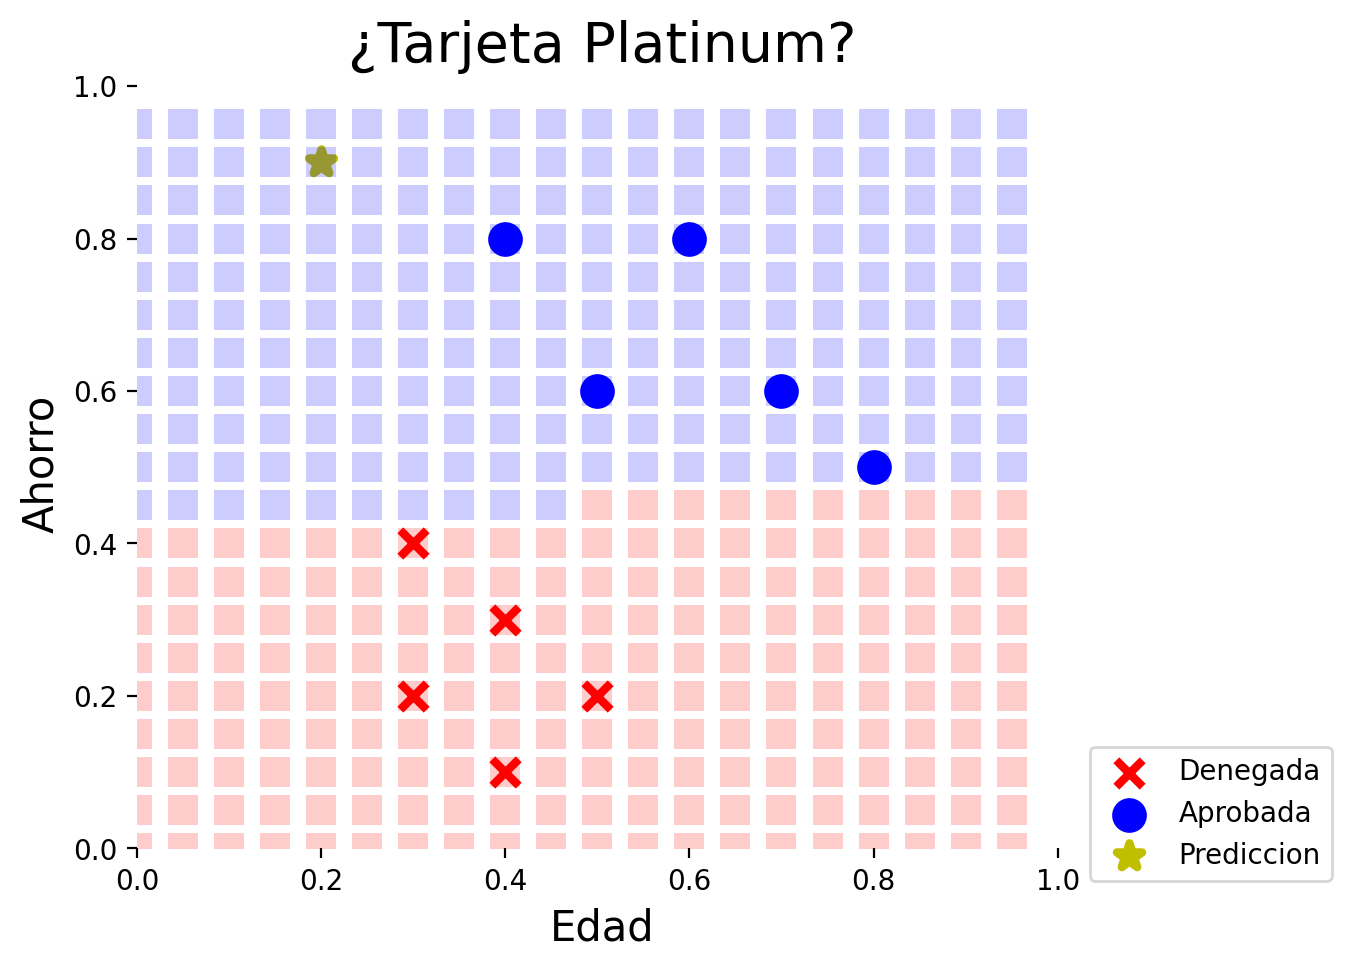

In [67]:
plt.figure(figsize=(6, 5), dpi=200)
plt.title("¿Tarjeta Platinum?", fontsize=20)

plt.scatter(personas[clases == 0].T[0],
            personas[clases == 0].T[1],
            marker="x", s=90, color="red",
            linewidths=3, label="Denegada")

plt.scatter(personas[clases == 1].T[0],
            personas[clases == 1].T[1],
            marker="o", s=90, color="blue",
            linewidths=3, label="Aprobada")

plt.scatter(edad_peso[0], edad_peso[1], 
            marker="*", s=90, color="y",
            label= 'Prediccion', linewidths=3)


for edad in np.arange(0, 1, 0.05):
    for ahorro in np.arange(0, 1, 0.05):
        color = activacion(pesos, [edad, ahorro], b)
        if color == 1:
            plt.scatter(edad, ahorro, marker="s", s=110,
                        color="blue", alpha=0.2, linewidths=0)
        else:
            plt.scatter(edad, ahorro, marker="s", s=110,
                        color="red", alpha=0.2, linewidths=0)

plt.xlabel("Edad", fontsize=15)
plt.ylabel("Ahorro", fontsize=15)
plt.legend(bbox_to_anchor=(1.3, 0.15))
plt.box(False)
plt.xlim((0, 1.01))
plt.ylim((0, 1.01))
plt.show()


In [64]:
from sklearn.linear_model import Perceptron
Perceptron= Perceptron().fit(personas, clases)
Perceptron.predict([edad_peso])

array([1])